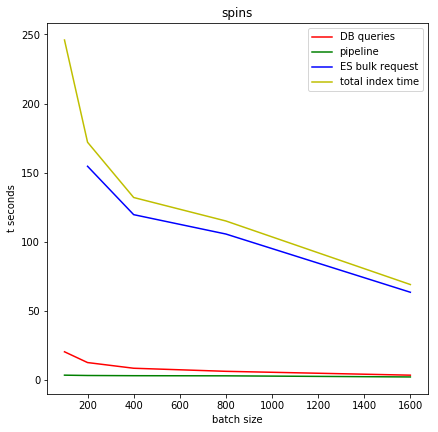

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import glob

path = "harvest/"
fig = plt.figure(0, figsize=[15, 15]) 

# todo: use sums for all times, display as a stacked graph + total time as time per 1m 
def plot_index(index, plotN):
    avg_batch = []
    avg_pipeline = []
    avg_bulk = []
    total_times = []
    
    columns = ['time', 'batchTime', 'transformTime', 'bulkTime']
    files = glob.glob(f'{path}{index}_*_*.log')
    sizes = sorted([int(sub.split('_')[1]) for sub in files])
    limit = files[0].split('_')[2]
    
    for size in sizes:
        filename = f'{path}{index}_{size}_{limit}'
        data = np.genfromtxt(filename, delimiter=',', skip_header=1, names=columns)
        avg_batch.append(np.sum(data['batchTime']))
        avg_pipeline.append(np.sum(data['transformTime']))
        avg_bulk.append(np.sum(data['bulkTime']))
        total_times.append(np.max(data['time']) - np.min(data['time']))


    #fig = plt.figure(0, figsize=[15, 15]) 
    #fig.suptitle(f'{index} index', fontsize=16)

    def subplot(n):
        ax = fig.add_subplot(n)
        ax.set_ylabel('t seconds')
        ax.set_xlabel('batch size')
        return ax

    ax = subplot(plotN)
    ax.set_title(index)
    ax.plot(sizes, avg_batch, color='r', label='DB queries')
    ax.plot(sizes, avg_pipeline, color='g', label='pipeline')
    ax.plot(sizes, avg_bulk, color='b', label='ES bulk request')
    ax.plot(sizes, total_times, color='y', label='total index time')
    ax.legend()

    #ax = subplot(222)
    #ax.plot(sizes, avg_bulk, color='b', label='bulkTime')
    #ax.legend()

    #ax = subplot(223)
    #ax.plot(sizes, total_times, color='y', label='total time')
    #ax.legend()

    plt.show()


plot_index('spins', 221)
#plot_index('epf', 222)
